# Logistic Regression Demo: Decision Boundaries and Probability Interpretation

This notebook explores the key concepts in logistic regression through visualizations and interactive examples. Focus on understanding how logistic regression makes classification decisions and interprets probabilities.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_classification
from sklearn.calibration import calibration_curve
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

## Section 1: Why Linear Regression Fails for Classification

Let's first understand why we can't simply use linear regression for binary classification problems.

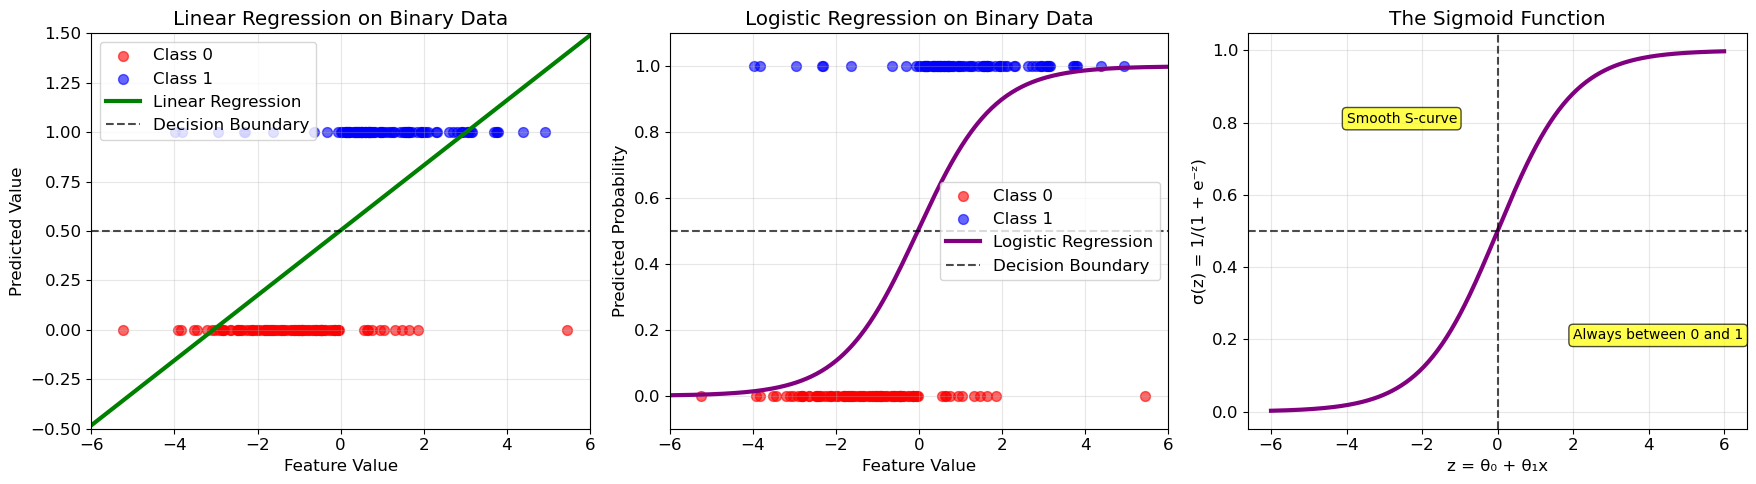

Why Linear Regression Fails for Classification:
• Can predict values outside [0,1] range
• No natural interpretation as probabilities
• Sensitive to outliers in the response

Why Logistic Regression Works:
• Output always between 0 and 1 (valid probabilities)
• Smooth decision boundary
• Models the probability directly


In [2]:
# Create a simple binary classification dataset
np.random.seed(42)
X_class = np.random.randn(200, 1) * 2
# Create separation: class 0 for X < 0, class 1 for X > 0, with some noise
y_binary = (X_class.flatten() > 0).astype(int)
# Add some noise to make it more realistic
noise_indices = np.random.choice(len(y_binary), size=20, replace=False)
y_binary[noise_indices] = 1 - y_binary[noise_indices]

# Fit linear regression (inappropriate)
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression().fit(X_class, y_binary)

# Fit logistic regression (appropriate)
logistic_model = LogisticRegression().fit(X_class, y_binary)

# Create predictions for plotting
X_plot = np.linspace(-6, 6, 300).reshape(-1, 1)
y_linear_pred = linear_model.predict(X_plot)
y_logistic_prob = logistic_model.predict_proba(X_plot)[:, 1]

# Create the comparison plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Linear regression attempt
ax1.scatter(X_class[y_binary == 0], y_binary[y_binary == 0],
           alpha=0.6, color='red', label='Class 0', s=50)
ax1.scatter(X_class[y_binary == 1], y_binary[y_binary == 1],
           alpha=0.6, color='blue', label='Class 1', s=50)
ax1.plot(X_plot, y_linear_pred, 'g-', linewidth=3, label='Linear Regression')
ax1.axhline(y=0.5, color='black', linestyle='--', alpha=0.7, label='Decision Boundary')
ax1.set_xlim(-6, 6)
ax1.set_ylim(-0.5, 1.5)
ax1.set_title('Linear Regression on Binary Data')
ax1.set_xlabel('Feature Value')
ax1.set_ylabel('Predicted Value')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Logistic regression
ax2.scatter(X_class[y_binary == 0], y_binary[y_binary == 0],
           alpha=0.6, color='red', label='Class 0', s=50)
ax2.scatter(X_class[y_binary == 1], y_binary[y_binary == 1],
           alpha=0.6, color='blue', label='Class 1', s=50)
ax2.plot(X_plot, y_logistic_prob, 'purple', linewidth=3, label='Logistic Regression')
ax2.axhline(y=0.5, color='black', linestyle='--', alpha=0.7, label='Decision Boundary')
ax2.set_xlim(-6, 6)
ax2.set_ylim(-0.1, 1.1)
ax2.set_title('Logistic Regression on Binary Data')
ax2.set_xlabel('Feature Value')
ax2.set_ylabel('Predicted Probability')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Sigmoid function properties
z_values = np.linspace(-6, 6, 300)
sigmoid_values = 1 / (1 + np.exp(-z_values))
ax3.plot(z_values, sigmoid_values, 'purple', linewidth=3, label='Sigmoid Function')
ax3.axhline(y=0.5, color='black', linestyle='--', alpha=0.7)
ax3.axvline(x=0, color='black', linestyle='--', alpha=0.7)
ax3.set_title('The Sigmoid Function')
ax3.set_xlabel('z = θ₀ + θ₁x')
ax3.set_ylabel('σ(z) = 1/(1 + e⁻ᶻ)')
ax3.grid(True, alpha=0.3)
ax3.text(2, 0.2, 'Always between 0 and 1', fontsize=10,
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
ax3.text(-4, 0.8, 'Smooth S-curve', fontsize=10,
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.show()

print("Why Linear Regression Fails for Classification:")
print("• Can predict values outside [0,1] range")
print("• No natural interpretation as probabilities")
print("• Sensitive to outliers in the response")
print("\nWhy Logistic Regression Works:")
print("• Output always between 0 and 1 (valid probabilities)")
print("• Smooth decision boundary")
print("• Models the probability directly")

**Key Takeaway:** Linear regression can predict impossible probability values and doesn't naturally model the S-shaped relationship between features and class probabilities that characterizes classification problems.

## Section 2: Decision Boundaries in 2D Feature Space

Let's visualize how logistic regression creates decision boundaries in two-dimensional feature space and how coefficients affect the boundary orientation.

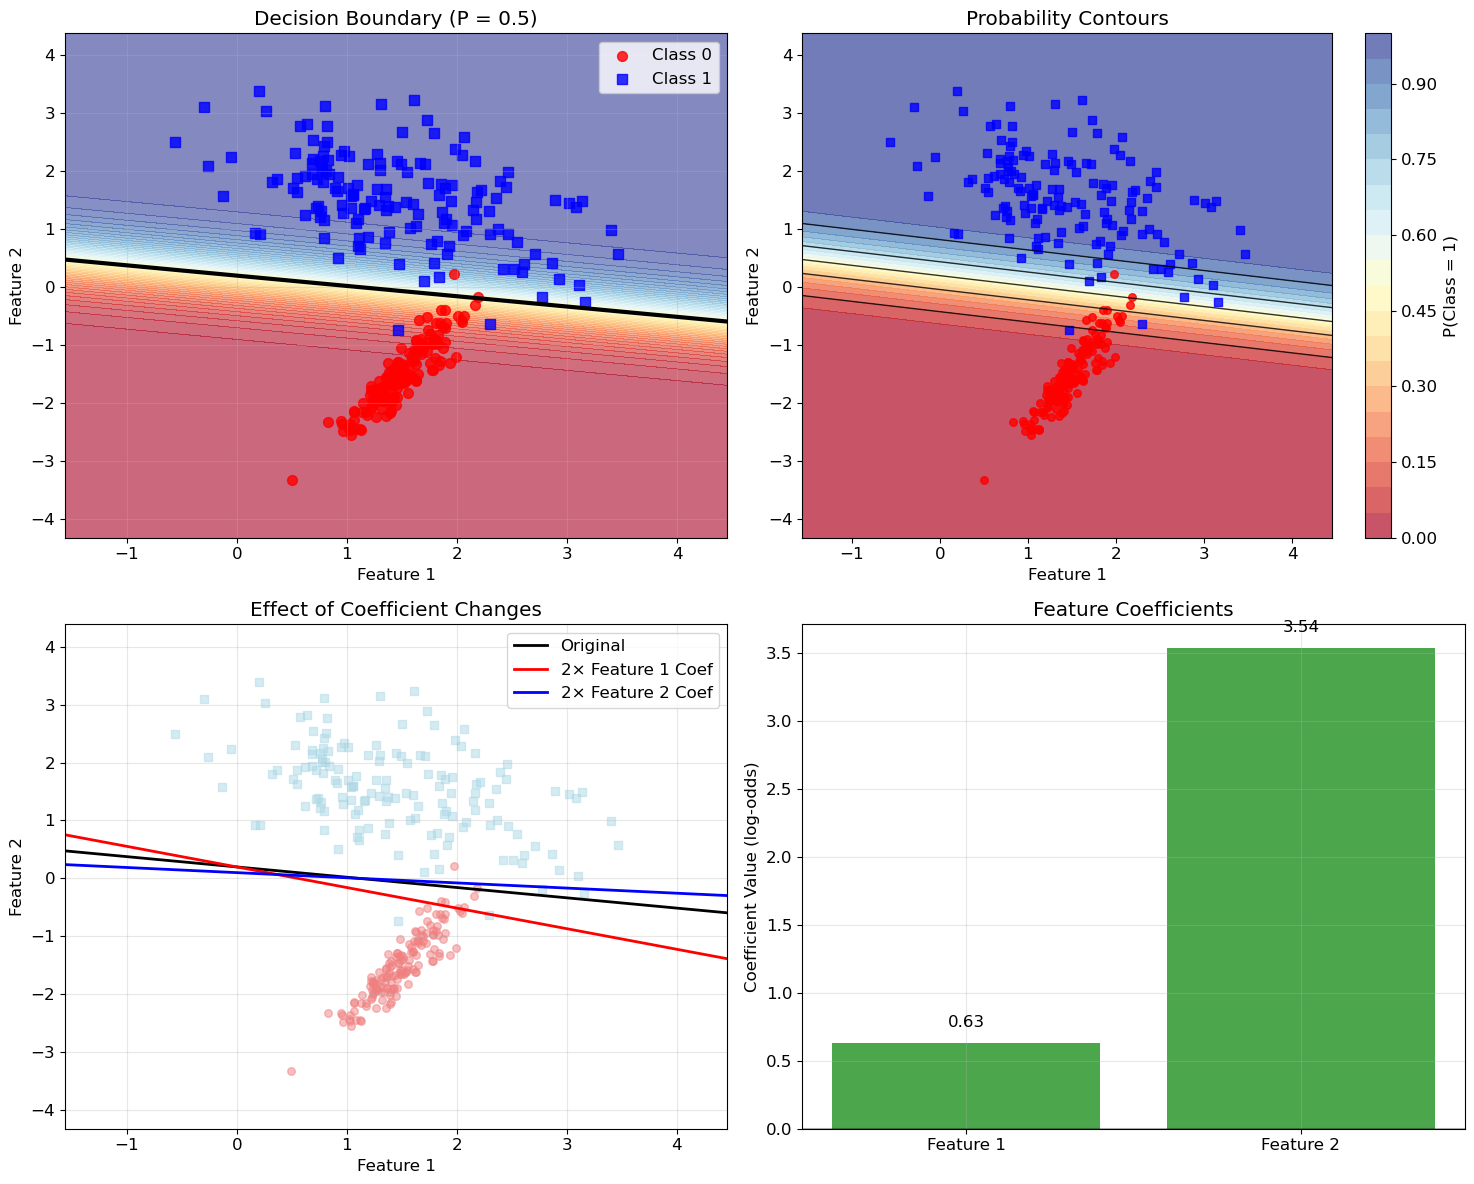

Decision Boundary Insights:
• Decision boundary equation: -0.70 + 0.63×X₁ + 3.54×X₂ = 0
• Intercept: -0.70 (shifts boundary position)
• Feature 1 coefficient: 0.63 (affects slope)
• Feature 2 coefficient: 3.54 (affects slope)
• Positive coefficients push decision toward class 1
• Larger magnitude coefficients create steeper boundaries


In [3]:
# Create 2D binary classification dataset
np.random.seed(42)
X_2d, y_2d = make_classification(n_samples=300, n_features=2, n_redundant=0,
                                n_informative=2, n_clusters_per_class=1,
                                class_sep=1.5, random_state=42)

# Fit logistic regression
model_2d = LogisticRegression().fit(X_2d, y_2d)
coefficients_2d = model_2d.coef_[0]
intercept_2d = model_2d.intercept_[0]

# Create a mesh for plotting decision boundary
h = 0.02
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Get probability predictions for the mesh
mesh_points = np.c_[xx.ravel(), yy.ravel()]
Z = model_2d.predict_proba(mesh_points)[:, 1]
Z = Z.reshape(xx.shape)

# Create subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Decision boundary with data points
ax1.contourf(xx, yy, Z, levels=50, alpha=0.6, cmap='RdYlBu')
contour = ax1.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=3)
ax1.scatter(X_2d[y_2d == 0, 0], X_2d[y_2d == 0, 1], c='red', marker='o', s=50, alpha=0.8, label='Class 0')
ax1.scatter(X_2d[y_2d == 1, 0], X_2d[y_2d == 1, 1], c='blue', marker='s', s=50, alpha=0.8, label='Class 1')
ax1.set_title('Decision Boundary (P = 0.5)')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Probability contours
contour_plot = ax2.contourf(xx, yy, Z, levels=np.linspace(0, 1, 21), cmap='RdYlBu', alpha=0.7)
ax2.contour(xx, yy, Z, levels=[0.1, 0.3, 0.5, 0.7, 0.9], colors='black', linewidths=1, alpha=0.8)
ax2.scatter(X_2d[y_2d == 0, 0], X_2d[y_2d == 0, 1], c='red', marker='o', s=30, alpha=0.8)
ax2.scatter(X_2d[y_2d == 1, 0], X_2d[y_2d == 1, 1], c='blue', marker='s', s=30, alpha=0.8)
ax2.set_title('Probability Contours')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
plt.colorbar(contour_plot, ax=ax2, label='P(Class = 1)')

# Plot 3: Effect of coefficients on decision boundary
# Demonstrate how changing coefficients changes the boundary
theta_variations = [
    [intercept_2d, coefficients_2d[0], coefficients_2d[1]],  # Original
    [intercept_2d, coefficients_2d[0] * 2, coefficients_2d[1]],  # Increase first coef
    [intercept_2d, coefficients_2d[0], coefficients_2d[1] * 2],  # Increase second coef
]
colors = ['black', 'red', 'blue']
labels = ['Original', '2× Feature 1 Coef', '2× Feature 2 Coef']

ax3.scatter(X_2d[y_2d == 0, 0], X_2d[y_2d == 0, 1], c='lightcoral', marker='o', s=30, alpha=0.5)
ax3.scatter(X_2d[y_2d == 1, 0], X_2d[y_2d == 1, 1], c='lightblue', marker='s', s=30, alpha=0.5)

for i, (theta, color, label) in enumerate(zip(theta_variations, colors, labels)):
    # Decision boundary line: theta0 + theta1*x1 + theta2*x2 = 0
    # Solving for x2: x2 = -(theta0 + theta1*x1) / theta2
    x1_line = np.linspace(x_min, x_max, 100)
    x2_line = -(theta[0] + theta[1] * x1_line) / theta[2]

    # Only plot within the axis limits
    valid_mask = (x2_line >= y_min) & (x2_line <= y_max)
    ax3.plot(x1_line[valid_mask], x2_line[valid_mask], color=color, linewidth=2, label=label)

ax3.set_xlim(x_min, x_max)
ax3.set_ylim(y_min, y_max)
ax3.set_title('Effect of Coefficient Changes')
ax3.set_xlabel('Feature 1')
ax3.set_ylabel('Feature 2')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Coefficient interpretation
feature_names = ['Feature 1', 'Feature 2']
colors_coef = ['green' if coef > 0 else 'red' for coef in coefficients_2d]
bars = ax4.bar(feature_names, coefficients_2d, color=colors_coef, alpha=0.7)
ax4.set_title('Feature Coefficients')
ax4.set_ylabel('Coefficient Value (log-odds)')
ax4.grid(True, alpha=0.3)
ax4.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Add value labels on bars
for bar, coef in zip(bars, coefficients_2d):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + (0.1 if height > 0 else -0.1),
             f'{coef:.2f}', ha='center', va='bottom' if height > 0 else 'top')

plt.tight_layout()
plt.show()

print("Decision Boundary Insights:")
print(f"• Decision boundary equation: {intercept_2d:.2f} + {coefficients_2d[0]:.2f}×X₁ + {coefficients_2d[1]:.2f}×X₂ = 0")
print(f"• Intercept: {intercept_2d:.2f} (shifts boundary position)")
print(f"• Feature 1 coefficient: {coefficients_2d[0]:.2f} (affects slope)")
print(f"• Feature 2 coefficient: {coefficients_2d[1]:.2f} (affects slope)")
print("• Positive coefficients push decision toward class 1")
print("• Larger magnitude coefficients create steeper boundaries")

**Key Takeaway:** The decision boundary is a straight line (hyperplane in higher dimensions) determined by the model coefficients. Coefficients control both the position and orientation of this boundary.

## Section 3: Nonlinear Decision Boundaries with Polynomial Features

Logistic regression can create nonlinear decision boundaries using polynomial features, just like linear regression.

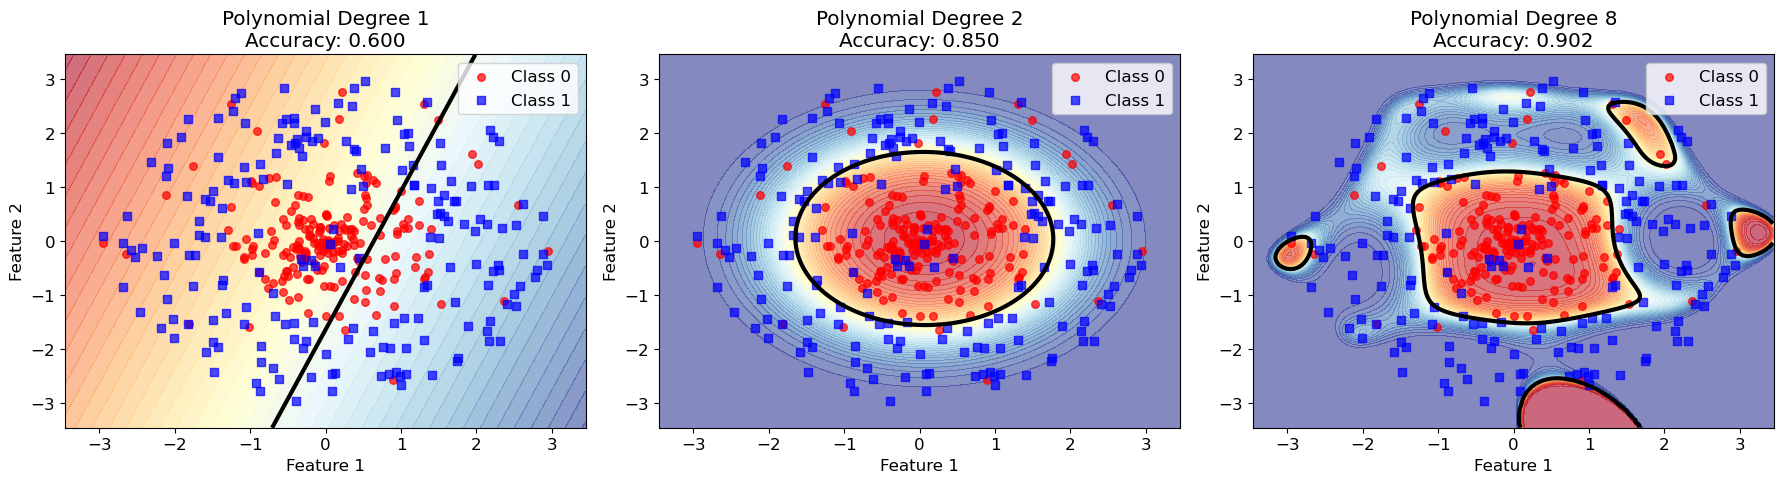

Model Complexity Comparison:
Degree 1: 3 features, accuracy = 0.600
Degree 2: 6 features, accuracy = 0.850
Degree 8: 45 features, accuracy = 0.902

Observations:
• Degree 1: Linear boundary, poor fit for circular pattern
• Degree 2: Quadratic features allow curved boundaries
• Degree 3: More complex boundaries, risk of overfitting


In [4]:
# Create a dataset that requires nonlinear separation
np.random.seed(42)
n_samples = 400

# Create circular pattern: inner circle is class 0, outer ring is class 1
angles = np.random.uniform(0, 2*np.pi, n_samples)
radii = np.random.uniform(0, 3, n_samples)

X_circle = np.column_stack([radii * np.cos(angles), radii * np.sin(angles)])
# Inner circle (radius < 1.5) is class 0, outer ring is class 1
y_circle = (radii > 1.5).astype(int)

# Add some noise to make it more interesting
noise_indices = np.random.choice(len(y_circle), size=40, replace=False)
y_circle[noise_indices] = 1 - y_circle[noise_indices]

# Fit models with different polynomial degrees
degrees = [1, 2, 8]
models_poly = {}

# Create mesh for plotting
h = 0.05
x_min, x_max = X_circle[:, 0].min() - 0.5, X_circle[:, 0].max() + 0.5
y_min, y_max = X_circle[:, 1].min() - 0.5, X_circle[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
mesh_points = np.c_[xx.ravel(), yy.ravel()]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, degree in enumerate(degrees):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X_circle)

    # Fit logistic regression
    model = LogisticRegression(max_iter=1000).fit(X_poly, y_circle)
    models_poly[degree] = (model, poly_features)

    # Get probability predictions for the mesh
    mesh_poly = poly_features.transform(mesh_points)
    Z_poly = model.predict_proba(mesh_poly)[:, 1]
    Z_poly = Z_poly.reshape(xx.shape)

    # Plot decision boundary
    axes[i].contourf(xx, yy, Z_poly, levels=50, alpha=0.6, cmap='RdYlBu')
    axes[i].contour(xx, yy, Z_poly, levels=[0.5], colors='black', linewidths=3)
    axes[i].scatter(X_circle[y_circle == 0, 0], X_circle[y_circle == 0, 1],
                   c='red', marker='o', s=30, alpha=0.7, label='Class 0')
    axes[i].scatter(X_circle[y_circle == 1, 0], X_circle[y_circle == 1, 1],
                   c='blue', marker='s', s=30, alpha=0.7, label='Class 1')

    # Calculate accuracy
    accuracy = model.score(X_poly, y_circle)

    axes[i].set_title(f'Polynomial Degree {degree}\nAccuracy: {accuracy:.3f}')
    axes[i].set_xlabel('Feature 1')
    axes[i].set_ylabel('Feature 2')
    axes[i].legend()
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()

# Compare model complexities
print("Model Complexity Comparison:")
for degree in degrees:
    model, poly_features = models_poly[degree]
    n_features = poly_features.transform(X_circle[:1]).shape[1]
    accuracy = model.score(poly_features.transform(X_circle), y_circle)
    print(f"Degree {degree}: {n_features} features, accuracy = {accuracy:.3f}")

print("\nObservations:")
print("• Degree 1: Linear boundary, poor fit for circular pattern")
print("• Degree 2: Quadratic features allow curved boundaries")
print("• Degree 3: More complex boundaries, risk of overfitting")

**Key Takeaway:** Polynomial features allow logistic regression to create nonlinear decision boundaries, but higher degrees increase model complexity and overfitting risk.

## Section 4: Probability Calibration and Thresholds

A well-calibrated model's predicted probabilities match the true frequencies. Let's explore calibration and how threshold selection affects classification performance.

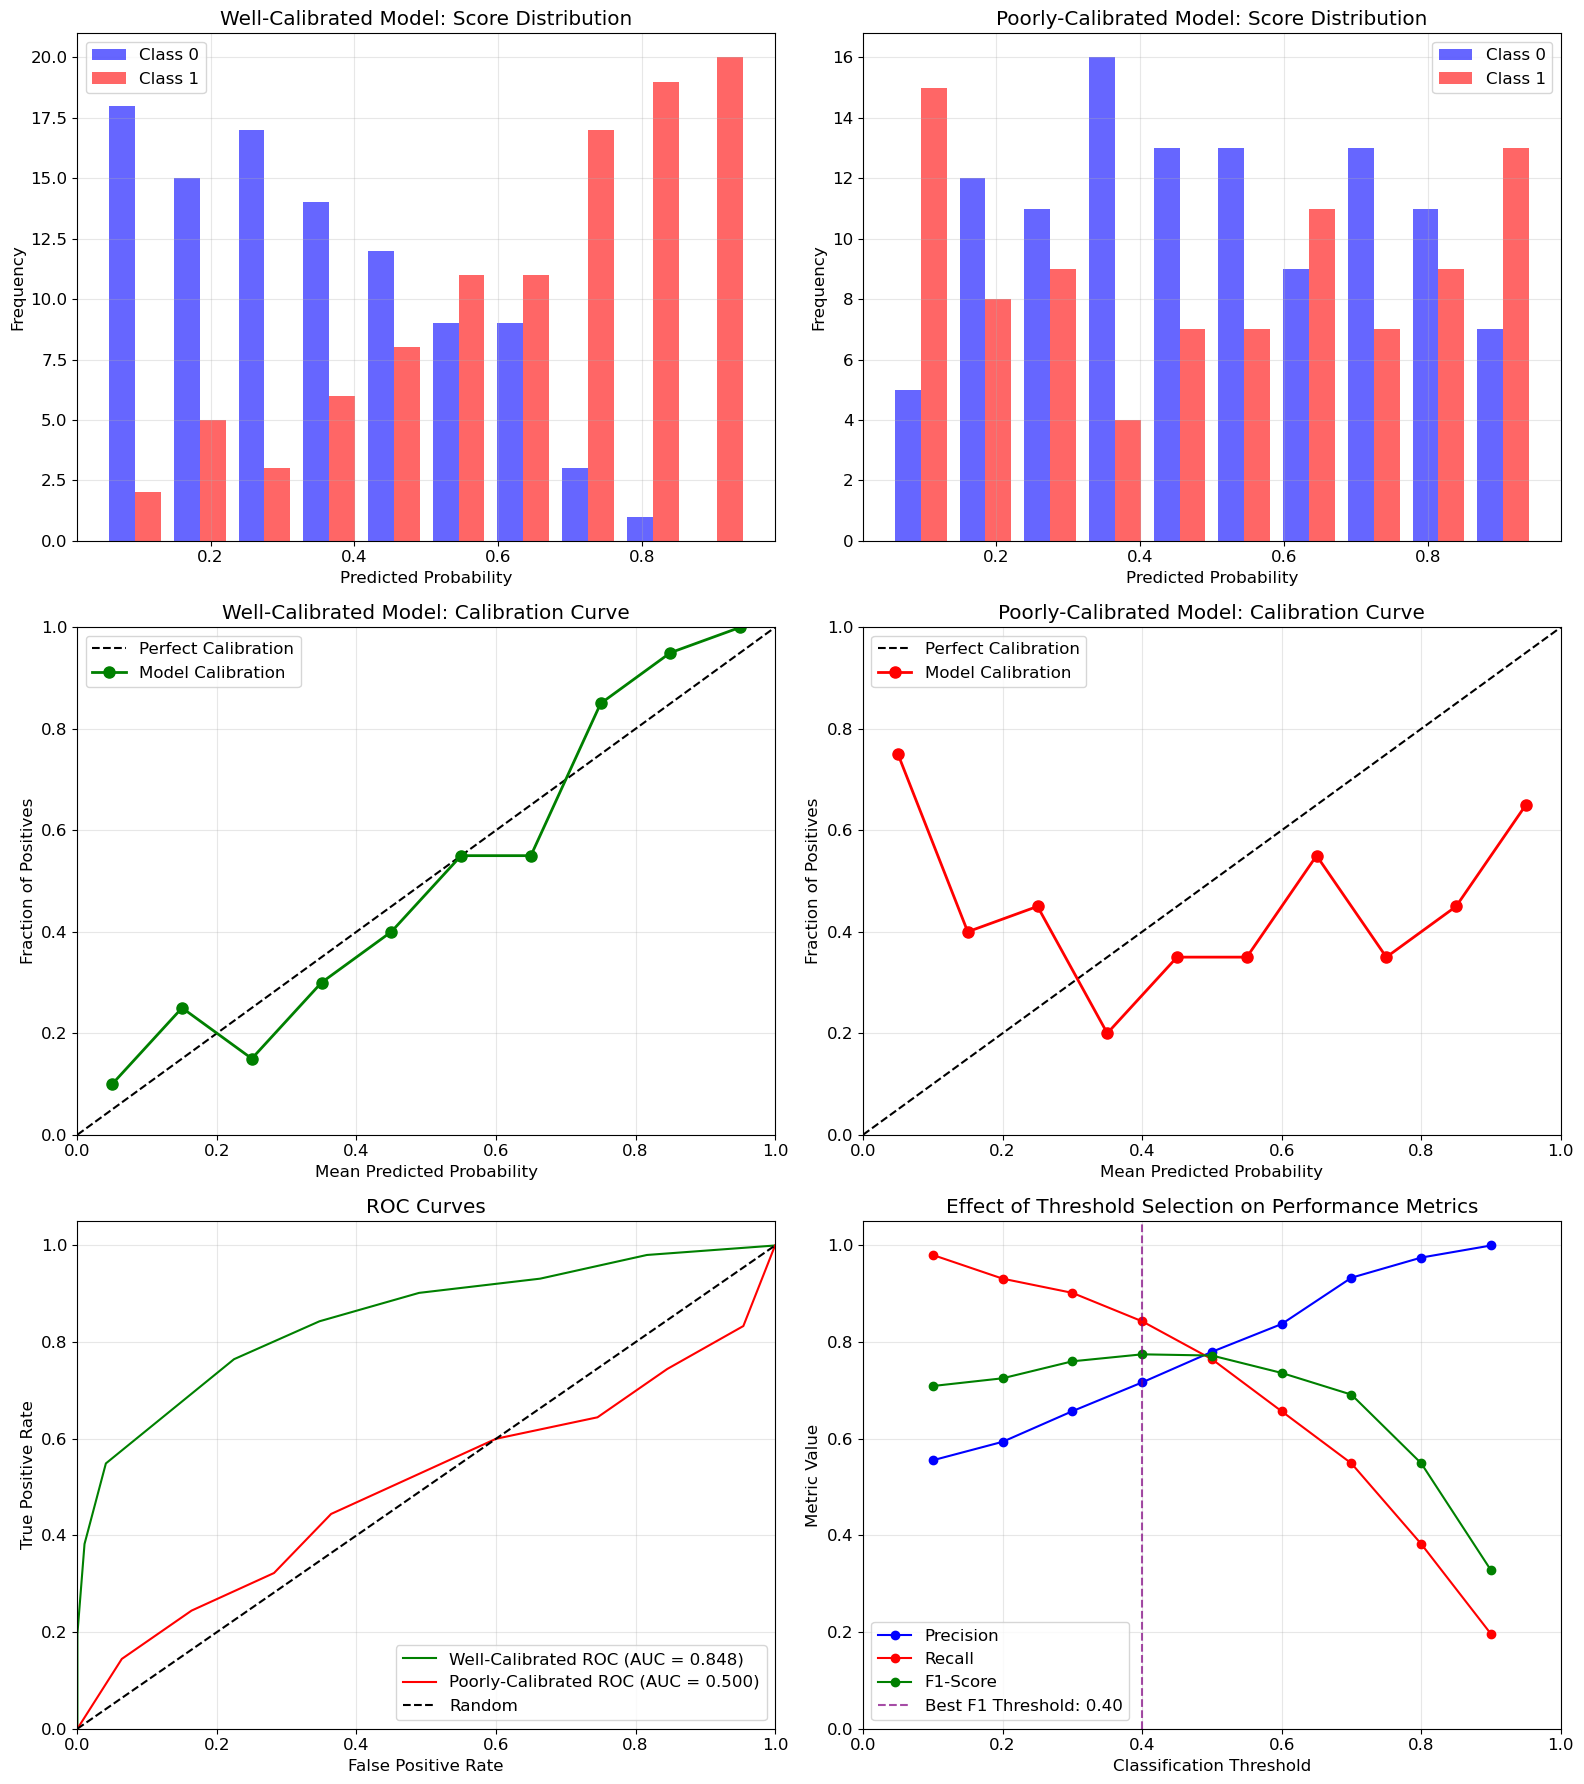

Well-calibrated model:
ROC AUC: 0.848
PR AUC: 0.878
Best threshold for F1: 0.40 (F1=0.775)

Calibration insights:
• A well-calibrated model's predicted probabilities match actual frequencies
• When a well-calibrated model predicts 70% probability, ~70% of such cases are actually positive
• Default threshold of 0.5 isn't always optimal - adjust based on application needs
• Increasing threshold: Higher precision, lower recall (fewer false positives)
• Decreasing threshold: Higher recall, lower precision (fewer false negatives)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from sklearn.metrics import roc_curve, precision_recall_curve, auc, f1_score
from scipy import stats

np.random.seed(42)

# Create 10 buckets with scores from 0.05 to 0.95 (midpoints of buckets)
bucket_scores = np.linspace(0.05, 0.95, 10)

# Creating well-calibrated dataset
well_calibrated_scores = []
well_calibrated_labels = []

# Creating poorly-calibrated dataset
poorly_calibrated_scores = []
poorly_calibrated_labels = []

# For each bucket, create 20 examples
for score in bucket_scores:
    # Well calibrated: proportion of positives = score
    bucket_labels = np.random.binomial(1, score, 20).astype(float)
    bucket_scores = np.ones(20) * score

    well_calibrated_scores.extend(bucket_scores)
    well_calibrated_labels.extend(bucket_labels)

    # Poorly calibrated: random proportion of positives
    random_calibration = np.random.uniform(0, 1)
    bucket_labels_poor = np.random.binomial(1, random_calibration, 20).astype(float)

    poorly_calibrated_scores.extend(bucket_scores)
    poorly_calibrated_labels.extend(bucket_labels_poor)

# Convert to numpy arrays
y_prob_well = np.array(well_calibrated_scores)
y_true_well = np.array(well_calibrated_labels)
y_prob_poor = np.array(poorly_calibrated_scores)
y_true_poor = np.array(poorly_calibrated_labels)

# Compute calibration curves
fraction_of_positives_well, mean_predicted_value_well = calibration_curve(y_true_well, y_prob_well, n_bins=10)
fraction_of_positives_poor, mean_predicted_value_poor = calibration_curve(y_true_poor, y_prob_poor, n_bins=10)

# Calculate ROC curves
fpr_well, tpr_well, thresholds_well = roc_curve(y_true_well, y_prob_well)
fpr_poor, tpr_poor, thresholds_poor = roc_curve(y_true_poor, y_prob_poor)

# Calculate AUC
roc_auc_well = auc(fpr_well, tpr_well)
roc_auc_poor = auc(fpr_poor, tpr_poor)

# Calculate precision-recall curves
precision_well, recall_well, pr_thresholds_well = precision_recall_curve(y_true_well, y_prob_well)
precision_poor, recall_poor, pr_thresholds_poor = precision_recall_curve(y_true_poor, y_prob_poor)

# Calculate PR AUC
pr_auc_well = auc(recall_well, precision_well)
pr_auc_poor = auc(recall_poor, precision_poor)

# Create visualization with 3x2 grid
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

# Row 1: Score distributions
# Plot 1: Well-calibrated model - score distributions
axes[0, 0].hist([y_prob_well[y_true_well == 0], y_prob_well[y_true_well == 1]],
               bins=10, alpha=0.6, color=['blue', 'red'], label=['Class 0', 'Class 1'])
axes[0, 0].set_xlabel('Predicted Probability')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Well-Calibrated Model: Score Distribution')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Poorly-calibrated model - score distributions
axes[0, 1].hist([y_prob_poor[y_true_poor == 0], y_prob_poor[y_true_poor == 1]],
               bins=10, alpha=0.6, color=['blue', 'red'], label=['Class 0', 'Class 1'])
axes[0, 1].set_xlabel('Predicted Probability')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Poorly-Calibrated Model: Score Distribution')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Row 2: Calibration curves
# Plot 3: Well-calibrated calibration curve
axes[1, 0].plot([0, 1], [0, 1], 'k--', label='Perfect Calibration')
axes[1, 0].plot(mean_predicted_value_well, fraction_of_positives_well, 'o-', color='green', linewidth=2,
         markersize=8, label='Model Calibration')
axes[1, 0].set_xlabel('Mean Predicted Probability')
axes[1, 0].set_ylabel('Fraction of Positives')
axes[1, 0].set_title('Well-Calibrated Model: Calibration Curve')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xlim([0, 1])
axes[1, 0].set_ylim([0, 1])

# Plot 4: Poorly-calibrated calibration curve
axes[1, 1].plot([0, 1], [0, 1], 'k--', label='Perfect Calibration')
axes[1, 1].plot(mean_predicted_value_poor, fraction_of_positives_poor, 'o-', color='red', linewidth=2,
         markersize=8, label='Model Calibration')
axes[1, 1].set_xlabel('Mean Predicted Probability')
axes[1, 1].set_ylabel('Fraction of Positives')
axes[1, 1].set_title('Poorly-Calibrated Model: Calibration Curve')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xlim([0, 1])
axes[1, 1].set_ylim([0, 1])

# Row 3: ROC, PR curves and threshold selection
# Plot 5: ROC and PR curves
axes[2, 0].plot(fpr_well, tpr_well, 'g-', label=f'Well-Calibrated ROC (AUC = {roc_auc_well:.3f})')
axes[2, 0].plot(fpr_poor, tpr_poor, 'r-', label=f'Poorly-Calibrated ROC (AUC = {roc_auc_poor:.3f})')
axes[2, 0].plot([0, 1], [0, 1], 'k--', label='Random')
axes[2, 0].set_xlim([0.0, 1.0])
axes[2, 0].set_ylim([0.0, 1.05])
axes[2, 0].set_xlabel('False Positive Rate')
axes[2, 0].set_ylabel('True Positive Rate')
axes[2, 0].set_title('ROC Curves')
axes[2, 0].legend(loc="lower right")
axes[2, 0].grid(True, alpha=0.3)

# Calculate various metrics at different thresholds
thresholds = np.linspace(0.1, 0.9, 9)
f1_scores = []
precisions = []
recalls = []

for threshold in thresholds:
    # Make predictions using the threshold
    y_pred = (y_prob_well > threshold).astype(int)

    # Calculate metrics
    f1 = f1_score(y_true_well, y_pred)
    precision = sum(y_pred[y_true_well == 1] == 1) / max(sum(y_pred == 1), 1)  # TP / (TP + FP)
    recall = sum(y_pred[y_true_well == 1] == 1) / sum(y_true_well == 1)  # TP / (TP + FN)

    f1_scores.append(f1)
    precisions.append(precision)
    recalls.append(recall)

# Plot 6: Threshold selection
axes[2, 1].plot(thresholds, precisions, 'b-o', label='Precision')
axes[2, 1].plot(thresholds, recalls, 'r-o', label='Recall')
axes[2, 1].plot(thresholds, f1_scores, 'g-o', label='F1-Score')
axes[2, 1].set_xlabel('Classification Threshold')
axes[2, 1].set_ylabel('Metric Value')
axes[2, 1].set_title('Effect of Threshold Selection on Performance Metrics')
axes[2, 1].legend()
axes[2, 1].grid(True, alpha=0.3)
axes[2, 1].set_xlim([0.0, 1.0])
axes[2, 1].set_ylim([0.0, 1.05])

# Add best threshold marker
best_threshold_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_idx]
axes[2, 1].axvline(x=best_threshold, color='purple', linestyle='--', alpha=0.7,
                  label=f'Best F1 Threshold: {best_threshold:.2f}')
axes[2, 1].legend()

plt.tight_layout()
plt.show()

# Print summary information
print("Well-calibrated model:")
print(f"ROC AUC: {roc_auc_well:.3f}")
print(f"PR AUC: {pr_auc_well:.3f}")
print(f"Best threshold for F1: {best_threshold:.2f} (F1={f1_scores[best_threshold_idx]:.3f})")
print("\nCalibration insights:")
print("• A well-calibrated model's predicted probabilities match actual frequencies")
print("• When a well-calibrated model predicts 70% probability, ~70% of such cases are actually positive")
print("• Default threshold of 0.5 isn't always optimal - adjust based on application needs")
print("• Increasing threshold: Higher precision, lower recall (fewer false positives)")
print("• Decreasing threshold: Higher recall, lower precision (fewer false negatives)")


**Key Takeaway:** Well-calibrated models have predicted probabilities that match actual frequencies. The classification threshold can be adjusted to optimize for precision, recall, or F1-score depending on the application needs.

## Section 5: Coefficient Interpretation as Log-Odds Ratios

In logistic regression, coefficients represent changes in log-odds, which can be interpreted as odds ratios when exponentiated.

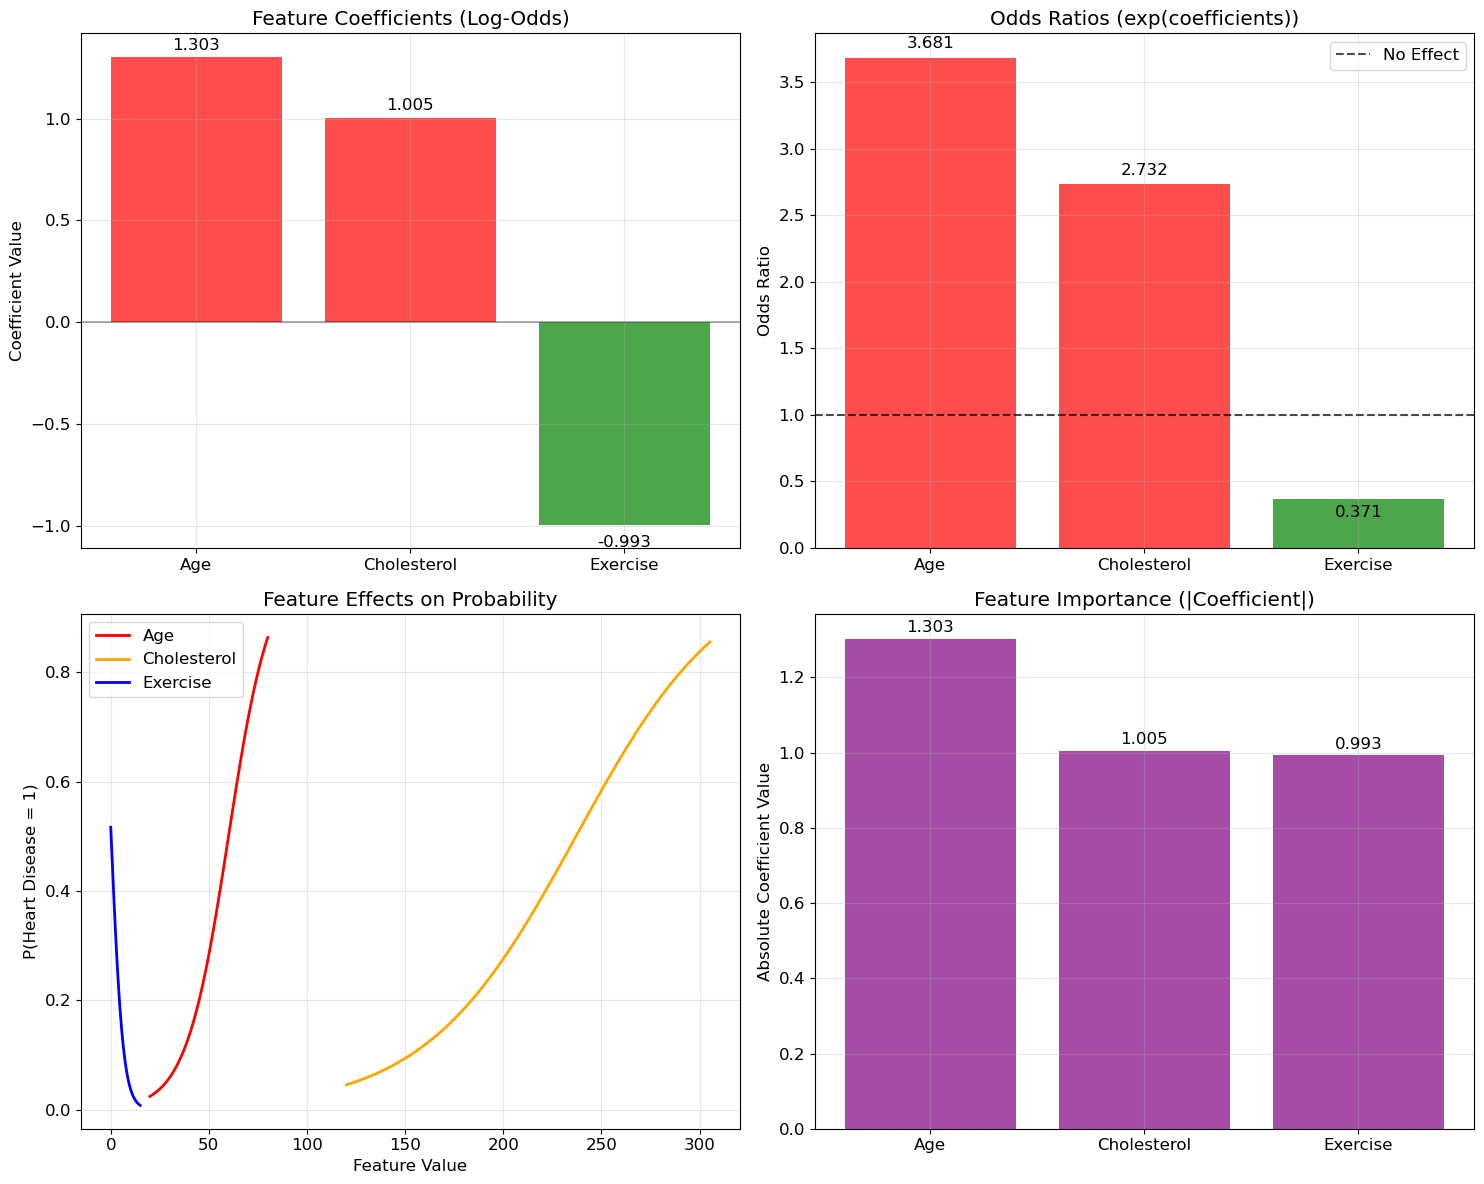

Coefficient Interpretation (standardized features):
Model accuracy: 0.790

Log-Odds Interpretation:
• Age: 1.303 - one std increase increases log-odds by 1.303
• Cholesterol: 1.005 - one std increase increases log-odds by 1.005
• Exercise: -0.993 - one std increase decreases log-odds by 0.993

Odds Ratio Interpretation:
• Age: OR = 3.681 - one std increase multiplies odds by 3.681
• Cholesterol: OR = 2.732 - one std increase multiplies odds by 2.732
• Exercise: OR = 0.371 - one std increase divides odds by 2.698

Example Patient (60 years, 250 cholesterol, 2hrs exercise):
Predicted probability of heart disease: 0.833
Predicted odds: 4.971


In [6]:
# Create an interpretable dataset: medical diagnosis example
np.random.seed(42)
n_patients = 500

# Features: age, cholesterol level, exercise hours per week
age = np.random.normal(50, 15, n_patients)
age = np.clip(age, 20, 80)  # Realistic age range

cholesterol = np.random.normal(200, 40, n_patients)
cholesterol = np.clip(cholesterol, 120, 350)  # Realistic cholesterol range

exercise = np.random.exponential(3, n_patients)  # Right-skewed distribution
exercise = np.clip(exercise, 0, 15)  # Max 15 hours per week

# Create realistic relationship for heart disease risk
# Higher age and cholesterol increase risk, more exercise decreases risk
log_odds = (-8 +                              # Base log-odds (low risk)
           0.08 * age +                      # Age effect
           0.02 * cholesterol +              # Cholesterol effect
           -0.3 * exercise)                  # Exercise protective effect

# Convert to probabilities and simulate diagnosis
probabilities = 1 / (1 + np.exp(-log_odds))
heart_disease = np.random.binomial(1, probabilities, n_patients)

# Standardize features for modeling
from sklearn.preprocessing import StandardScaler
features = np.column_stack([age, cholesterol, exercise])
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Fit logistic regression
model_medical = LogisticRegression().fit(features_scaled, heart_disease)
coefficients_medical = model_medical.coef_[0]
intercept_medical = model_medical.intercept_[0]

# Create visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Coefficient visualization
feature_names_med = ['Age', 'Cholesterol', 'Exercise']
colors_med = ['red' if coef > 0 else 'green' for coef in coefficients_medical]
bars = ax1.bar(feature_names_med, coefficients_medical, color=colors_med, alpha=0.7)
ax1.set_title('Feature Coefficients (Log-Odds)')
ax1.set_ylabel('Coefficient Value')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Add value labels on bars
for bar, coef in zip(bars, coefficients_medical):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + (0.02 if height > 0 else -0.05),
             f'{coef:.3f}', ha='center', va='bottom' if height > 0 else 'top')

# Plot 2: Odds ratios (exponentiated coefficients)
odds_ratios = np.exp(coefficients_medical)
colors_or = ['red' if or_val > 1 else 'green' for or_val in odds_ratios]
bars2 = ax2.bar(feature_names_med, odds_ratios, color=colors_or, alpha=0.7)
ax2.set_title('Odds Ratios (exp(coefficients))')
ax2.set_ylabel('Odds Ratio')
ax2.axhline(y=1, color='black', linestyle='--', alpha=0.7, label='No Effect')
ax2.grid(True, alpha=0.3)
ax2.legend()

# Add value labels on bars
for bar, or_val in zip(bars2, odds_ratios):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + (0.05 if height > 1 else -0.05),
             f'{or_val:.3f}', ha='center', va='bottom' if height > 1 else 'top')

# Plot 3: Probability curves for each feature
# Show how probability changes with each feature (holding others at mean)
feature_ranges = [
    np.linspace(age.min(), age.max(), 100),
    np.linspace(cholesterol.min(), cholesterol.max(), 100),
    np.linspace(exercise.min(), exercise.max(), 100)
]

colors_lines = ['red', 'orange', 'blue']
mean_features = np.mean(features, axis=0)

for i, (feature_range, color, name) in enumerate(zip(feature_ranges, colors_lines, feature_names_med)):
    # Create feature matrix with one feature varying, others at mean
    test_features = np.tile(mean_features, (100, 1))
    test_features[:, i] = feature_range

    # Scale and predict
    test_features_scaled = scaler.transform(test_features)
    probabilities_curve = model_medical.predict_proba(test_features_scaled)[:, 1]

    ax3.plot(feature_range, probabilities_curve, color=color, linewidth=2, label=name)

ax3.set_xlabel('Feature Value')
ax3.set_ylabel('P(Heart Disease = 1)')
ax3.set_title('Feature Effects on Probability')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Feature importance through coefficient magnitudes
importance = np.abs(coefficients_medical)
sorted_idx = np.argsort(importance)[::-1]
sorted_features = [feature_names_med[i] for i in sorted_idx]
sorted_importance = importance[sorted_idx]

bars4 = ax4.bar(sorted_features, sorted_importance, color='purple', alpha=0.7)
ax4.set_title('Feature Importance (|Coefficient|)')
ax4.set_ylabel('Absolute Coefficient Value')
ax4.grid(True, alpha=0.3)

# Add value labels
for bar, imp in zip(bars4, sorted_importance):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{imp:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print interpretation
print("Coefficient Interpretation (standardized features):")
print(f"Model accuracy: {model_medical.score(features_scaled, heart_disease):.3f}")
print("\nLog-Odds Interpretation:")
for name, coef in zip(feature_names_med, coefficients_medical):
    direction = "increases" if coef > 0 else "decreases"
    print(f"• {name}: {coef:.3f} - one std increase {direction} log-odds by {abs(coef):.3f}")

print("\nOdds Ratio Interpretation:")
for name, coef, or_val in zip(feature_names_med, coefficients_medical, odds_ratios):
    if or_val > 1:
        print(f"• {name}: OR = {or_val:.3f} - one std increase multiplies odds by {or_val:.3f}")
    else:
        print(f"• {name}: OR = {or_val:.3f} - one std increase divides odds by {1/or_val:.3f}")

# Example prediction with interpretation
example_patient = [60, 250, 2]  # 60 years old, 250 cholesterol, 2 hours exercise
example_scaled = scaler.transform([example_patient])
prob_disease = model_medical.predict_proba(example_scaled)[0, 1]
print(f"\nExample Patient (60 years, 250 cholesterol, 2hrs exercise):")
print(f"Predicted probability of heart disease: {prob_disease:.3f}")
print(f"Predicted odds: {prob_disease / (1 - prob_disease):.3f}")

**Key Takeaway:** Logistic regression coefficients represent changes in log-odds. Positive coefficients increase disease probability, negative coefficients decrease it. Odds ratios (exp(coefficient)) show multiplicative effects on odds.

## Summary

Key insights from this logistic regression demo:

1. **Why Not Linear Regression**: Linear regression can predict impossible probabilities and lacks the S-shaped relationship characteristic of classification

2. **Decision Boundaries**: Logistic regression creates linear decision boundaries (hyperplanes) determined by model coefficients

3. **Nonlinear Boundaries**: Polynomial features allow curved decision boundaries but increase model complexity

4. **Probability Calibration**: Well-calibrated models have predicted probabilities that match actual frequencies

5. **Threshold Selection**: Classification threshold can be adjusted to optimize precision, recall, or F1-score

6. **Coefficient Interpretation**: Coefficients represent log-odds changes; odds ratios show multiplicative effects on odds

Understanding these concepts helps you know when logistic regression is appropriate and how to interpret its results effectively for classification problems.